# Deep Learning Pose Project: Camera pose plot
This is a tutorial to Plot Camera Poses Exported from Reality Capture.

## Reality Capture's Camera Frame View


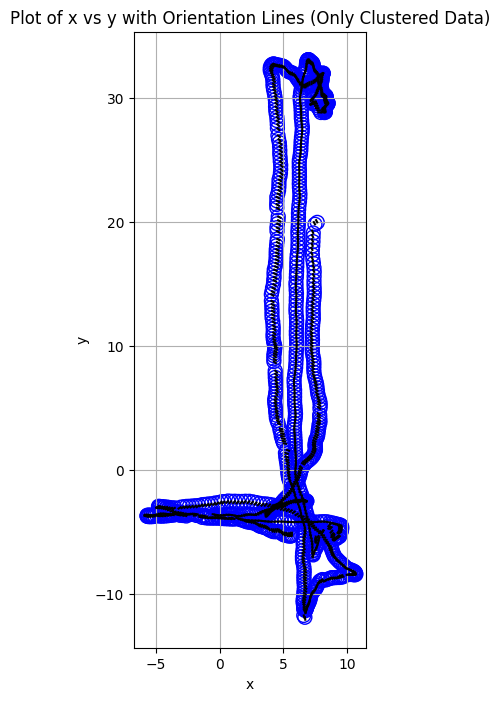

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def eul2rot(heading, pitch, roll):
    """Converts Euler angles to rotation matrix: heading, pitch, roll -> rotation about X, Y, Z
    XYZ sequence or ZYX sequence - Robot or Mobile """
    heading, pitch, roll = np.deg2rad(heading), np.deg2rad(pitch), np.deg2rad(roll)
    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(heading), -np.sin(heading)],
        [0, np.sin(heading), np.cos(heading)]
    ])
    Ry = np.array([
        [np.cos(pitch), 0, np.sin(pitch)],
        [0, 1, 0],
        [-np.sin(pitch), 0, np.cos(pitch)]
    ])
    Rz = np.array([
        [np.cos(roll), -np.sin(roll), 0],
        [np.sin(roll), np.cos(roll), 0],
        [0, 0, 1]
    ])

    R = Rz@Ry@Rx
    return R

# Load the CSV file
file_path = 'pose_data.csv'
data = pd.read_csv(file_path)

# Calculate the new end points using rotation matrix
line_length = 0.2  # constant length for line segments
end_points = np.array([
    eul2rot(h, p, r) @ np.array([0, line_length,0])
    for h, p, r in zip(data['heading'], data['pitch'], data['roll'])
])

# Extract x and y components
end_x = data['x'] + end_points[:, 0]/np.sqrt(end_points[:, 0]**2+end_points[:, 1]**2)*line_length
end_y = data['y'] + end_points[:, 1]/np.sqrt(end_points[:, 0]**2+end_points[:, 1]**2)*line_length


# Plotting x vs y with circle points and orientation lines
plt.figure(figsize=(3, 8))
plt.scatter(data['x'], data['y'], s=100, facecolors='none', edgecolors='b')  # Circle points
for _, row in data.iterrows():
    plt.plot([row['x'], end_x[_]], [row['y'], end_y[_]], 'k-')  # Lines for orientation

plt.title('Plot of x vs y with Orientation Lines (Only Clustered Data)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
